In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [157]:
import warnings
warnings.filterwarnings("ignore")

In [158]:
## Read data
import os
print(os.getcwd())

/Users/kunalchakraborty/Downloads/industry_project_HQ


In [159]:
## Investigate the output of simple linear regression
### Load training data
data = pd.read_csv("data/ag_transformed_features.csv")
## Transform date
data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

In [160]:
used_features = ["dfy", "infl", "svar", "d/e", "lty", "tms", "tbl", "dfr", "d/p", "d/y", "ltr", "e/p"]
target = ["premium"]

In [161]:
data.set_index("date", inplace=True)

In [162]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def fix_pred_format(pred_array):
    pred_list = []
    for pred in pred_array:
        pred_list.append(pred[0])
    return pred_list

## The model is overfitting 

In [185]:
## Check the rolling window training scheme

### Write a function for rolling model training. Use it for predictions as well
def roll_training(Y,X, datelist, model, model_name, train_rolling_length = 60, forecast_ahead = 1, test_rolling_length = 1, verbose=False):
    """
    Y : Target variable
    X : Training data
    """
    
    predictions = []
    int_start  = 0
    for int_end in range(train_rolling_length, len(datelist)-forecast_ahead, test_rolling_length):
        # Define intervals
        train_interval = datelist[int_start:int_end]
        test_interval = datelist[int_end:int_end+test_rolling_length]
        
        # train interval for yt would be different
        train_interval_y = datelist[int_start+forecast_ahead:int_end+forecast_ahead]
        test_interval_y = datelist[int_end+forecast_ahead:int_end+test_rolling_length+forecast_ahead]
        
        if verbose:
            print("Traing start date = {} and end date = {}".format(min(train_interval), max(train_interval)))
            print("Testing start date = {} and end date = {}".format(min(test_interval), max(test_interval)))
            print("Yt date  = {} and {}".format(min(train_interval_y), max(train_interval_y)))
            print("Prediction Yt date = {} and {} ".format(min(test_interval_y), max(test_interval_y)))
        Yt = Y.loc[train_interval_y]
        Xt = X.loc[train_interval]
        # Testing data
        Xt_test = X.loc[test_interval]
        # Normalize data
        Xt = scaler.fit_transform(Xt)
        Xt_test = scaler.transform(Xt_test)
        
        model.fit(Xt,Yt)
        # Perform prediction
        Yt_pred = model.predict(Xt_test)
        if model_name == "reg":
            # Fix prediction format
            Yt_pred = fix_pred_format(Yt_pred)
        df_temp = pd.DataFrame([test_interval_y, Yt_pred]).T
        df_temp.columns = ["date",model_name]
        predictions.append(df_temp)
        # Update index
        int_start += test_rolling_length
        
    pred_df = pd.concat(predictions)
    return pred_df

In [166]:
### Load training data
data = pd.read_csv("data/ag_transformed_features.csv")
## Transform date
data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

In [167]:
used_features = ["dfy", "infl", "svar", "d/e", "lty", "tms", "tbl", "dfr", "d/p", "d/y", "ltr", "e/p"]
target = ["premium"]

In [168]:
data.set_index("date", inplace=True)

In [169]:
# data = data.dropna()
# Y = data[["premium"]]
# X = data[used_features]
# datelist = data.index.tolist()
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


# preds = roll_training(Y,X,datelist, reg,"model")

In [170]:
data.isnull().sum()

Index           0
D12             0
E12             0
b/m            10
tbl             0
AAA             0
BAA             0
lty             0
ntis            0
Rfree           0
infl            0
ltr             0
corpr           0
svar            0
csp           216
CRSP_SPvw       0
CRSP_SPvwx      0
returns         1
premium         1
d/p             0
d/y             1
e/p             0
d/e             0
tms             0
dfy             0
dfr             0
dtype: int64

In [171]:
## For simplicity drop the columns with NAN values
#data = data.drop(["b/m", "csp"], axis=1)

In [172]:
data.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,CRSP_SPvwx,returns,premium,d/p,d/y,e/p,d/e,tms,dfy,dfr
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,55.42,1.75667,2.96333,0.502896,0.0282,0.0412,0.0487,0.0408,0.027736,0.0021,...,0.005395,NaN,NaN,-3.451521,NaN,-2.928627,-0.522894,0.0126,0.0075,0.0052
1959-02-01,55.41,1.76333,3.03667,0.494946,0.0270,0.0414,0.0489,0.0402,0.027899,0.0019,...,0.002210,0.002471,0.000571,-3.447556,-3.447736,-2.903999,-0.543557,0.0132,0.0075,0.0009
1959-03-01,55.44,1.77000,3.11000,0.516860,0.0280,0.0413,0.0485,0.0403,0.024984,0.0022,...,0.000826,0.003203,0.001003,-3.444322,-3.443781,-2.880679,-0.563643,0.0123,0.0072,-0.0100
1959-04-01,57.59,1.77667,3.20667,0.498597,0.0295,0.0423,0.0486,0.0414,0.024361,0.0020,...,0.039093,0.041451,0.039451,-3.478608,-3.440561,-2.888116,-0.590492,0.0119,0.0063,-0.0055
1959-05-01,58.68,1.78333,3.30333,0.483077,0.0284,0.0437,0.0496,0.0417,0.025887,0.0022,...,0.019043,0.021507,0.019307,-3.493617,-3.474867,-2.877168,-0.616449,0.0133,0.0059,-0.0109


In [298]:
data.columns

Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
       'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw',
       'CRSP_SPvwx', 'returns', 'premium', 'd/p', 'd/y', 'e/p', 'd/e', 'tms',
       'dfy', 'dfr'],
      dtype='object')

In [176]:
data = data.dropna()
Y = data[["premium"]]
X = data[used_features]
datelist = data.index.tolist()

In [299]:
X.columns

Index(['dfy', 'infl', 'svar', 'd/e', 'lty', 'tms', 'tbl', 'dfr', 'd/p', 'd/y',
       'ltr', 'e/p'],
      dtype='object')

In [177]:
## Dummy 
x_dummy = X.iloc[:20,:]
y_dummy = Y.iloc[:20,:]

In [188]:
roll_training(y_dummy, x_dummy, datelist[:20],reg,"reg",15,0,1,True)

Traing start date = 1959-02-01 and end date = 1960-04-01
Testing start date = 1960-05-01 and end date = 1960-05-01
Yt date  = 1959-02-01 and 1960-04-01
Prediction Yt date = 1960-05-01 and 1960-05-01 
Traing start date = 1959-03-01 and end date = 1960-05-01
Testing start date = 1960-06-01 and end date = 1960-06-01
Yt date  = 1959-03-01 and 1960-05-01
Prediction Yt date = 1960-06-01 and 1960-06-01 
Traing start date = 1959-04-01 and end date = 1960-06-01
Testing start date = 1960-07-01 and end date = 1960-07-01
Yt date  = 1959-04-01 and 1960-06-01
Prediction Yt date = 1960-07-01 and 1960-07-01 
Traing start date = 1959-05-01 and end date = 1960-07-01
Testing start date = 1960-08-01 and end date = 1960-08-01
Yt date  = 1959-05-01 and 1960-07-01
Prediction Yt date = 1960-08-01 and 1960-08-01 
Traing start date = 1959-06-01 and end date = 1960-08-01
Testing start date = 1960-09-01 and end date = 1960-09-01
Yt date  = 1959-06-01 and 1960-08-01
Prediction Yt date = 1960-09-01 and 1960-09-01 


,date,reg
0,1960-05-01,0.026419
0,1960-06-01,0.022549
0,1960-07-01,-0.025076
0,1960-08-01,0.02684
0,1960-09-01,-0.059182


In [194]:
data[data.index.isin(pred.index)]

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,CRSP_SPvwx,returns,premium,d/p,d/y,e/p,d/e,tms,dfy,dfr
date,,,,,,,,,,,,,,,,,,,,,
1964-03-01,78.98,2.330000,4.180000,0.523675,0.0354,0.0438,0.0483,0.0424,0.017783,0.0031,...,0.015814,0.017663,0.014563,-3.523326,-3.508273,-2.938883,-0.584443,0.0070,0.0045,-0.0099
1964-04-01,79.46,2.346670,4.230000,0.525303,0.0347,0.0440,0.0485,0.0423,0.020768,0.0029,...,0.005297,0.008554,0.005654,-3.522256,-3.516197,-2.933052,-0.589205,0.0076,0.0045,-0.0007
1964-05-01,80.37,2.363330,4.280000,0.519036,0.0348,0.0441,0.0485,0.0422,0.021179,0.0026,...,0.011460,0.013931,0.011331,-3.526569,-3.515182,-2.932688,-0.593881,0.0074,0.0044,0.0007
1964-06-01,81.69,2.380000,4.330000,0.512207,0.0348,0.0441,0.0485,0.0419,0.020503,0.0030,...,0.016779,0.018892,0.015892,-3.535831,-3.519540,-2.937364,-0.598467,0.0071,0.0044,-0.0021
1964-07-01,83.18,2.400000,4.376670,0.506361,0.0346,0.0440,0.0483,0.0421,0.021313,0.0030,...,0.017953,0.020688,0.017688,-3.545538,-3.527463,-2.944719,-0.600819,0.0075,0.0043,0.0044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,916.07,15.879000,28.940000,0.284412,0.0162,0.0637,0.0758,0.0510,0.024750,0.0014,...,0.005401,0.006333,0.004933,-4.055095,-4.050226,-3.454868,-0.600227,0.0348,0.0121,-0.0012
2002-09-01,815.29,15.799000,30.040000,0.324555,0.0163,0.0615,0.0740,0.0480,0.029302,0.0014,...,-0.110421,-0.108576,-0.109976,-3.943597,-4.060146,-3.301014,-0.642583,0.0317,0.0125,-0.0087
2002-10-01,885.76,15.890667,29.223333,0.293437,0.0158,0.0632,0.0773,0.0508,0.025673,0.0014,...,0.087103,0.088060,0.086660,-4.020714,-3.937812,-3.411479,-0.609236,0.0350,0.0141,0.0054


In [199]:
## Check evolution of r2 with forecasting horizon
r2_error_check = []
for i in range(0,13):
    pred = roll_training(Y, X, datelist,reg,"reg",60,i,1)
    pred.set_index("date",inplace=True)
    #print(i)
    r2_error_check.append(r2_score(pred["reg"], data[data.index.isin(pred.index)]["premium"]))

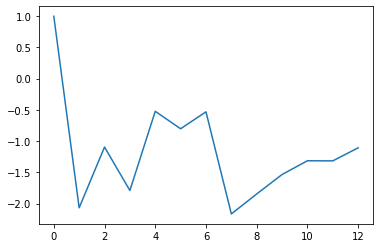

In [200]:
plt.figure()
plt.plot(range(0,13), r2_error_check)

In [179]:
pred = roll_training(Y, X, datelist,reg,"reg",60,1)

In [180]:
pred.set_index("date",inplace=True)

In [181]:
pred

,reg
date,
1964-03-01,0.01397
1964-04-01,0.024423
1964-05-01,0.010677
1964-06-01,0.003326
1964-07-01,0.011294
...,...
2002-08-01,0.038832
2002-09-01,0.018876
2002-10-01,-0.005754


In [182]:
df

,RF_71,RF_51,RF_55,XG_3,XG_7,XG_11,EN_1,EN_2,EN_3,lasso_11,lasso_12,lasso_13,ridge_99,ridge_98,ridge_97,mean_pred,median_pred,ensemble_ols,actuals
dates,,,,,,,,,,,,,,,,,,,
1964-03-01,0.010334,0.010639,0.009675,0.022084,0.020101,0.020190,0.006755,0.006755,0.006755,0.006755,0.006755,0.006755,0.007046,0.007047,0.007047,0.010313,0.007047,0.007305,0.014563
1964-04-01,0.002310,0.000150,0.002167,-0.012808,-0.014667,-0.014667,0.006981,0.006981,0.006981,0.006981,0.006981,0.006981,0.007698,0.007699,0.007700,0.001831,0.006981,-0.000720,0.005654
1964-05-01,0.011462,0.011319,0.012769,0.029437,0.037260,0.037260,0.006418,0.006418,0.006418,0.006418,0.006418,0.006418,0.006294,0.006293,0.006293,0.013126,0.006418,0.007341,0.011331
1964-06-01,0.011201,0.010498,0.012246,0.020050,0.019810,0.019277,0.006285,0.006285,0.006285,0.006285,0.006285,0.006285,0.006729,0.006730,0.006730,0.010065,0.006730,0.007096,0.015892
1964-07-01,-0.002209,-0.002818,-0.001520,-0.013855,-0.016413,-0.016828,0.006609,0.006609,0.006609,0.006609,0.006609,0.006609,0.007497,0.007498,0.007499,0.000567,0.006609,-0.000656,0.017688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,0.008326,0.008104,0.010196,-0.005598,-0.005800,-0.005800,-0.001949,-0.001949,-0.001949,-0.001949,-0.001949,-0.001949,0.000350,0.000353,0.000356,-0.000081,-0.001949,-0.000704,0.004933
2002-09-01,-0.016333,-0.017458,-0.020002,-0.006835,-0.010475,-0.010475,-0.000864,-0.000864,-0.000864,-0.000864,-0.000864,-0.000864,-0.000913,-0.000914,-0.000914,-0.005967,-0.000914,0.004746,-0.109976
2002-10-01,0.005246,0.006095,0.007226,-0.007877,-0.010691,-0.010691,-0.003533,-0.003533,-0.003533,-0.003533,-0.003533,-0.003533,-0.004177,-0.004178,-0.004179,-0.002961,-0.003533,0.003099,0.086660


In [184]:
r2_score(pred["reg"], df["actuals"])

-2.067740488163842

In [104]:
## 
data["premium"].head()

date
1959-02-01    0.000571
1959-03-01    0.001003
1959-04-01    0.039451
1959-05-01    0.019307
1959-06-01   -0.003537
Name: premium, dtype: float64

In [106]:
data["premium"].shift(-1).head()

date
1959-02-01    0.001003
1959-03-01    0.039451
1959-04-01    0.019307
1959-05-01   -0.003537
1959-06-01    0.034950
Name: premium, dtype: float64

In [109]:
## predict for 1 day ahead in time
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [117]:
pred = roll_training(Y, X, datelist,reg,"reg",60,1,False)

In [124]:
pred["actual"] = Y[Y.index.isin(pred["date"])].values

In [126]:
pred.set_index("date",inplace=True)

<AxesSubplot:xlabel='date'>

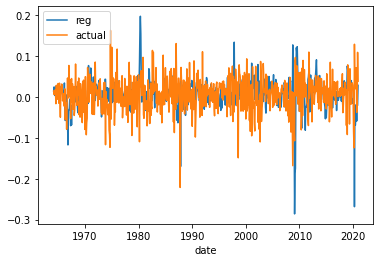

In [127]:
pred.plot()

## Beginning of analysis

In [265]:
df = pd.read_csv("data/mega_pred.csv")
df["dates"] = df["dates"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

In [268]:
df.tail()

,RF_3,RF_7,RF_63,XG_3,XG_7,XG_11,EN_1,EN_2,EN_3,lasso_17,lasso_18,lasso_19,ridge_99,ridge_98,ridge_97,mean_pred,median_pred,ensemble_ols,actuals
dates,,,,,,,,,,,,,,,,,,,
2020-08-01,0.009985,0.009122,0.008841,0.005059,0.002473,0.002411,0.009079,0.009079,0.009079,0.009079,0.009079,0.009079,0.005445,0.005440,0.005435,0.007246,0.009079,0.003954,0.071471
2020-09-01,0.014449,0.014853,0.013674,0.008371,0.009235,0.009236,0.011285,0.011285,0.011285,0.011285,0.011285,0.011285,0.008523,0.008519,0.008515,0.010872,0.011285,0.003281,-0.037927
2020-10-01,0.016136,0.014383,0.016131,0.021869,0.023126,0.022816,0.011064,0.011064,0.011064,0.011064,0.011064,0.011064,0.015421,0.015427,0.015434,0.015142,0.015421,0.005857,-0.026312
2020-11-01,0.006684,0.005230,0.007201,0.012975,0.012980,0.012980,0.009211,0.009211,0.009211,0.009211,0.009211,0.009211,0.011186,0.011189,0.011192,0.009792,0.009211,0.006145,0.108936
2020-12-01,0.012648,0.012895,0.011996,0.007365,0.005608,0.005568,0.010989,0.010989,0.010989,0.010989,0.010989,0.010989,0.003071,0.003060,0.003048,0.008746,0.010989,0.003547,0.038362


In [267]:
df.set_index("dates",inplace=True)

In [269]:
df.columns

Index(['RF_3', 'RF_7', 'RF_63', 'XG_3', 'XG_7', 'XG_11', 'EN_1', 'EN_2',
       'EN_3', 'lasso_17', 'lasso_18', 'lasso_19', 'ridge_99', 'ridge_98',
       'ridge_97', 'mean_pred', 'median_pred', 'ensemble_ols', 'actuals'],
      dtype='object')

In [272]:
pred_cols = ['RF_3', 'RF_7', 'RF_63', 'XG_3', 'XG_7', 'XG_11', 'EN_1', 'EN_2',
       'EN_3', 'lasso_17', 'lasso_18', 'lasso_19', 'ridge_99', 'ridge_98',
       'ridge_97', 'mean_pred', 'median_pred', 'ensemble_ols']

In [273]:
## Compute correlation with actual
corr_amt = []
for col in pred_cols:
    corr_amt.append(np.corrcoef(df[col],df["actuals"])[0][1])

In [274]:
# Compute adjusted rscore
from sklearn.metrics import r2_score

In [275]:
r2score = []
for col in pred_cols:
    r2score.append(r2_score(df["actuals"],df[col]))

In [276]:
corr_amt

[-0.016171060764301696,
 -0.016856051873053224,
 -0.019383271343871467,
 0.027141631048523792,
 0.028811965862516914,
 0.026508804828200186,
 -0.013191685956456466,
 -0.013191685956456466,
 -0.013191685956456466,
 -0.013191685956456466,
 -0.013191685956456466,
 -0.013191685956456466,
 -0.014420131486308708,
 -0.014416840709864685,
 -0.014413538544070367,
 -1.533171860038227e-05,
 -0.027506018509618653,
 0.07608764725722043]

In [277]:
r2score

[-0.06370073310223501,
 -0.06448288191195739,
 -0.06530834238649286,
 -0.10132476679604352,
 -0.11748109314352062,
 -0.12028001654112952,
 -0.01823296795272822,
 -0.01823296795272822,
 -0.01823296795272822,
 -0.01823296795272822,
 -0.01823296795272822,
 -0.01823296795272822,
 -0.03963101889045295,
 -0.03968888854665931,
 -0.03974700379145646,
 -0.028706980242060087,
 -0.030151431780914395,
 0.005789330065139486]

## The r2score is terribly low - and it seems to be normal

## However, there is clear cut advantage of using an ensemble
## Let's try other algorithms

In [278]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=3)

In [279]:
df.columns

Index(['RF_3', 'RF_7', 'RF_63', 'XG_3', 'XG_7', 'XG_11', 'EN_1', 'EN_2',
       'EN_3', 'lasso_17', 'lasso_18', 'lasso_19', 'ridge_99', 'ridge_98',
       'ridge_97', 'mean_pred', 'median_pred', 'ensemble_ols', 'actuals'],
      dtype='object')

In [280]:
base_models = ['RF_3', 'RF_7', 'RF_63', 'XG_3', 'XG_7', 'XG_11', 'EN_1', 'EN_2',
       'EN_3', 'lasso_17', 'lasso_18', 'lasso_19', 'ridge_99', 'ridge_98',
       'ridge_97']

In [281]:
## Have to split train and test set  - 60:40
pred_datelist = pred.index.tolist()
splitno = int(len(pred_datelist)*0.6)
train_split = pred_datelist[:splitno]
test_split = pred_datelist[splitno:]

training_data_x = df[df.index.isin(train_split)][base_models]
training_data_y = df[df.index.isin(train_split)]['actuals']

#-------------------#
testing_data_x = df[df.index.isin(test_split)][base_models]
testing_data_y = df[df.index.isin(test_split)]['actuals']

In [282]:
rf.fit(training_data_x, training_data_y)

RandomForestRegressor(max_depth=3)

In [283]:
predictions_rf = rf.predict(testing_data_x)

In [284]:
predictions_rf = pd.DataFrame(predictions_rf, index= test_split)

In [285]:
predictions_rf.columns = ["pred_rf"]

In [286]:
predictions_rf["actuals"] = testing_data_y.values

<AxesSubplot:>

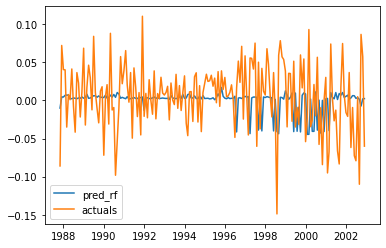

In [287]:
predictions_rf.plot()

In [322]:
## Try this with other models
def ensembler(df, model, model_name, pred_datelist, percentage_split,base_models):
    splitno = int(len(pred_datelist)*percentage_split)
    train_split = pred_datelist[:splitno]
    test_split = pred_datelist[splitno:]

    training_data_x = df[df.index.isin(train_split)][base_models]
    training_data_y = df[df.index.isin(train_split)]['actuals']

    #-------------------#
    testing_data_x = df[df.index.isin(test_split)][base_models]
    testing_data_y = df[df.index.isin(test_split)]['actuals']
    
    #-------------------#
    model.fit(training_data_x, training_data_y)
    predictions = model.predict(testing_data_x)
    predictions = pd.DataFrame(predictions, index= test_split)
    predictions.columns = [model_name]
    return predictions

In [289]:
predictions_rf1 = ensembler(df, rf, "random_forest", 0.6)

In [290]:
## Try everything else
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

xgb = GradientBoostingRegressor(max_depth=3)
ridge = Ridge(alpha=2)
lasso = Lasso(alpha = 0.02)

In [291]:
predictions_xgb1 = ensembler(df, xgb, "xgboost", 0.6)
predictions_r1 = ensembler(df, ridge, "ridge", 0.6)
predictions_l1 = ensembler(df, lasso, "lasso", 0.6)

In [292]:
pred_df =pd.concat([predictions_rf1,predictions_xgb1,predictions_r1,predictions_l1], axis=1)

In [293]:
pred_df["actuals"] = testing_data_y.values

<AxesSubplot:>

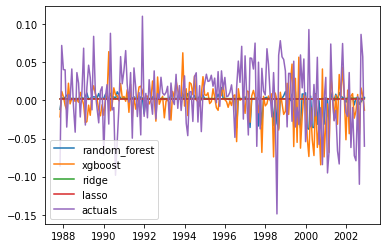

In [294]:
pred_df.plot()

## Implementation of trading strategies 

In [300]:
## Create trading strategy
def trading_strategy(yactual, ypred):
    # strat 1: Long on market
    strat1_ret = yactual
    # strat 2: Long if pred positive, short if pred negative
    bool_temp = [1 if x > 0 else -1 for x in ypred.values]
    strat2_ret = yactual*bool_temp
    # strat 3: 2x long if pred positive, 0 if pred negative
    bool_temp = [2 if x > 0 else 0 for x in ypred.values]
    strat3_ret = yactual*bool_temp
    # strat 4: 1x long if pred positive, 0 if pred negative
    bool_temp = [1 if x > 0 else 0 for x in ypred.values]
    strat4_ret = yactual*bool_temp
    
    ret_df = pd.DataFrame([strat1_ret, strat2_ret, strat3_ret, strat4_ret]).T
    ret_df.columns = ["Strategy 1", "Strategy 2", "Strategy 3", "Strategy 4"]
    
    # Cumulative return
    cum_ret = ret_df + 1
    cum_ret = cum_ret.cumprod()
    return ret_df, cum_ret

In [301]:
data.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,CRSP_SPvwx,returns,premium,d/p,d/y,e/p,d/e,tms,dfy,dfr
date,,,,,,,,,,,,,,,,,,,,,
1959-02-01,55.41,1.76333,3.03667,0.494946,0.0270,0.0414,0.0489,0.0402,0.027899,0.0019,...,0.002210,0.002471,0.000571,-3.447556,-3.447736,-2.903999,-0.543557,0.0132,0.0075,0.0009
1959-03-01,55.44,1.77000,3.11000,0.516860,0.0280,0.0413,0.0485,0.0403,0.024984,0.0022,...,0.000826,0.003203,0.001003,-3.444322,-3.443781,-2.880679,-0.563643,0.0123,0.0072,-0.0100
1959-04-01,57.59,1.77667,3.20667,0.498597,0.0295,0.0423,0.0486,0.0414,0.024361,0.0020,...,0.039093,0.041451,0.039451,-3.478608,-3.440561,-2.888116,-0.590492,0.0119,0.0063,-0.0055
1959-05-01,58.68,1.78333,3.30333,0.483077,0.0284,0.0437,0.0496,0.0417,0.025887,0.0022,...,0.019043,0.021507,0.019307,-3.493617,-3.474867,-2.877168,-0.616449,0.0133,0.0059,-0.0109
1959-06-01,58.47,1.79000,3.40000,0.483219,0.0321,0.0446,0.0504,0.0419,0.026882,0.0025,...,-0.003196,-0.001037,-0.003537,-3.486298,-3.489883,-2.844738,-0.641560,0.0098,0.0058,0.0034


## First hand analysis on mini-predictions

In [464]:
mini_df = pd.read_csv("data/mini_predictions.csv")

In [465]:
mini_df["date"] = mini_df["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

In [466]:
mini_df.set_index("date",inplace=True)

In [467]:
mini_df

,ada,gb,ridge,lasso,lr,rf,actuals
date,,,,,,,
1964-03-01,-0.003227,-0.022221,0.009175,0.006755,0.013970,-0.003334,0.014563
1964-04-01,0.005817,0.015173,0.018478,0.006981,0.024423,0.003343,0.005654
1964-05-01,0.008256,-0.012525,0.009564,0.006418,0.010677,0.000263,0.011331
1964-06-01,0.004383,0.009479,0.009216,0.006285,0.003326,0.007608,0.015892
1964-07-01,0.000603,0.009213,0.010681,0.006609,0.011294,0.001426,0.017688
...,...,...,...,...,...,...,...
2020-08-01,0.020952,0.017171,-0.019606,0.009079,-0.023801,0.005037,0.071471
2020-09-01,-0.031362,-0.040940,-0.059954,0.011285,-0.059066,-0.045460,-0.037927
2020-10-01,-0.028624,0.002023,-0.025048,0.011064,-0.019882,-0.029963,-0.026312


In [468]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [469]:
### Pass minidf to ensembler
## Try everything else
base_models =["ada","gb","ridge","lasso","lr","rf"]

pred_datelist = mini_df.index.tolist()
small_df = mini_df.copy()
predictions_rf1 = ensembler(small_df, rf, "rf", pred_datelist, 0.6, base_models)
predictions_xgb1 = ensembler(small_df, xgb, "xgboost", pred_datelist, 0.6, base_models)
predictions_r1 = ensembler(small_df, ridge, "ridge", pred_datelist, 0.6, base_models)
predictions_l1 = ensembler(small_df, lasso, "lasso", pred_datelist, 0.6, base_models)
predictions_lr1 = ensembler(small_df, lr, "linear_regression", pred_datelist, 0.6, base_models)

In [470]:
pred_df =pd.concat([predictions_rf1,predictions_xgb1,predictions_r1,predictions_l1,predictions_lr1], axis=1)

In [471]:
pred_df["actuals"] = mini_df[mini_df.index.isin(pred_df.index.tolist())]["actuals"]

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

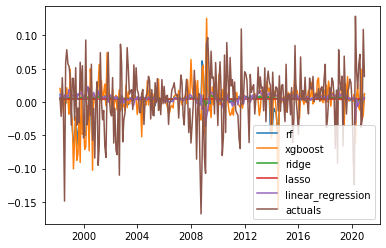

In [472]:
plt.figure(figsize=(10,6))
pred_df.plot()

## Implementation of trading strategy

In [473]:
## 
rf_ret, rf_cumret = trading_strategy(pred_df["actuals"], pred_df["rf"])

<AxesSubplot:>

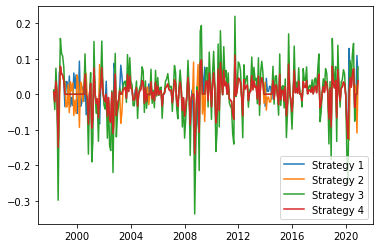

In [474]:
rf_ret.plot()

<AxesSubplot:>

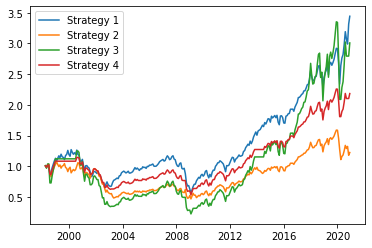

In [475]:
rf_cumret.plot()

In [476]:
## Get normal model predictions 
base_pred = mini_df[mini_df.index.isin(predictions_rf1.index.tolist())][base_models]

#### Basic comparision of all individual models and ensembled models

In [477]:
## Compare strategy 2 for every model
strat_dict = {}
for model in base_pred.columns:
    ret, cum_ret = trading_strategy(pred_df["actuals"], base_pred[model])
    strat_dict[model] = {"return":ret, "cumulative_return":cum_ret}

<AxesSubplot:>

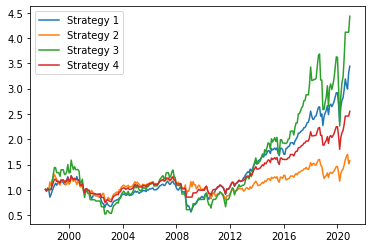

In [478]:
strat_dict["ada"]["cumulative_return"].plot()

In [479]:
pred_df.columns

Index(['rf', 'xgboost', 'ridge', 'lasso', 'linear_regression', 'actuals'], dtype='object')

In [480]:
rf_ret, rf_cumret = trading_strategy(pred_df["actuals"], pred_df["rf"])
xg_ret, xg_cumret = trading_strategy(pred_df["actuals"], pred_df["xgboost"])
ridge_ret, ridge_cumret = trading_strategy(pred_df["actuals"], pred_df["ridge"])
lasso_ret, lasso_cumret = trading_strategy(pred_df["actuals"], pred_df["lasso"])
lr_ret, lr_cumret = trading_strategy(pred_df["actuals"], pred_df["linear_regression"])
strat_dict["ensemble_rf"] = {"return":rf_ret, "cumulative_return":rf_cumret}
strat_dict["ensemble_xg"] = {"return":xg_ret, "cumulative_return":xg_cumret}
strat_dict["ensemble_ridge"] = {"return":ridge_ret, "cumulative_return":ridge_cumret}
strat_dict["ensemble_lasso"] = {"return":lasso_ret, "cumulative_return":lasso_cumret}
strat_dict["ensemble_lr"] = {"return":lr_ret, "cumulative_return":lr_cumret}

In [481]:
strat2 = {}
for key, value in strat_dict.items():
    strat2[key] = value["cumulative_return"]["Strategy 2"]

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

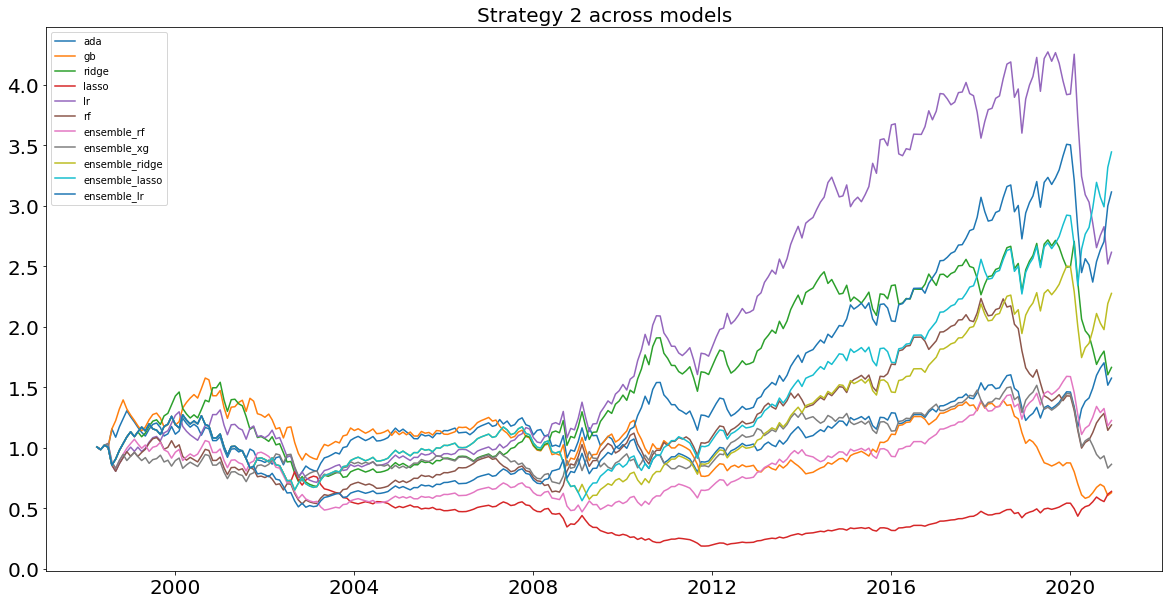

In [482]:
pd.DataFrame(strat2).plot(figsize=(20,10))
plt.title("Strategy 2 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [483]:
strat3 = {}
for key, value in strat_dict.items():
    strat3[key] = value["cumulative_return"]["Strategy 3"]

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

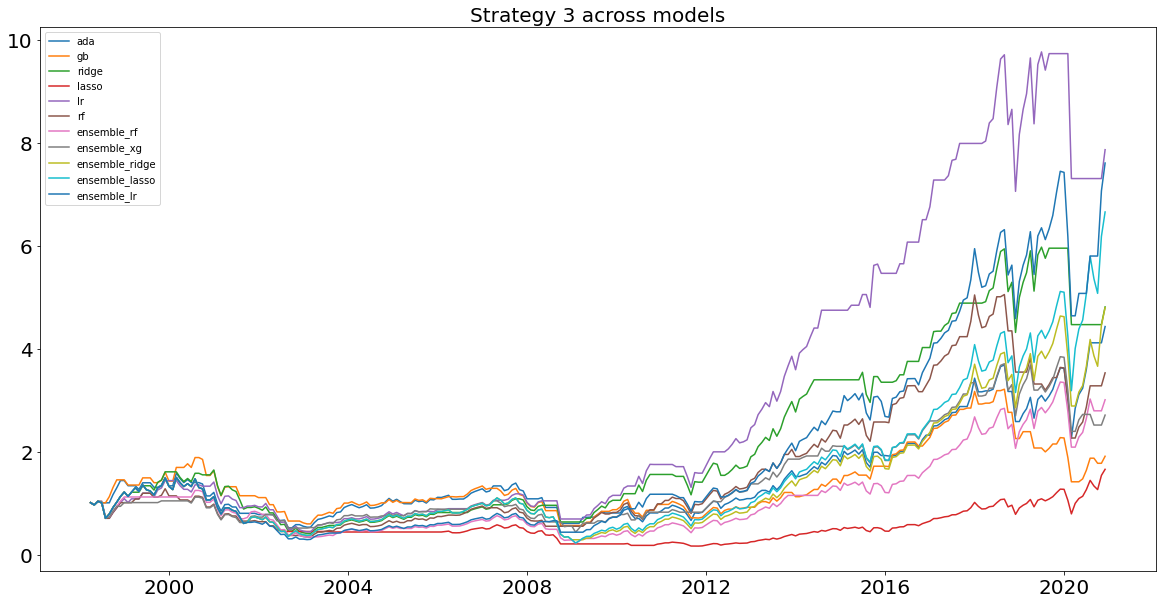

In [484]:
pd.DataFrame(strat3).plot(figsize=(20,10))
plt.title("Strategy 3 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [485]:
strat4 = {}
for key, value in strat_dict.items():
    strat4[key] = value["cumulative_return"]["Strategy 4"]

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

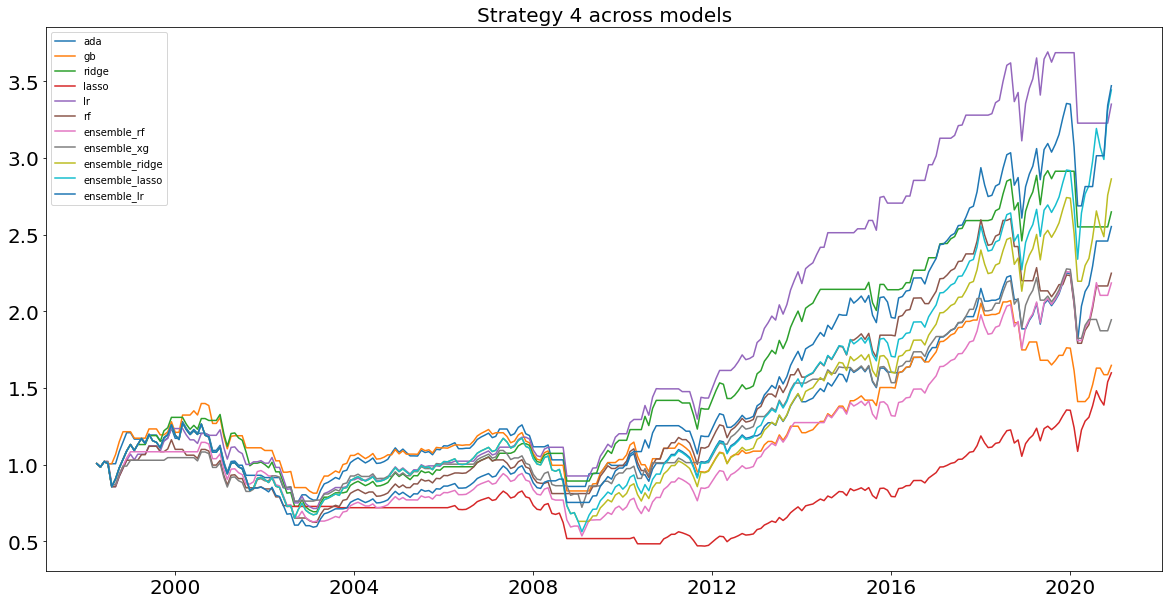

In [486]:
pd.DataFrame(strat4).plot(figsize=(20,10))
plt.title("Strategy 4 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [487]:
strat1 = {}
for key, value in strat_dict.items():
    strat1[key] = value["cumulative_return"]["Strategy 1"]

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

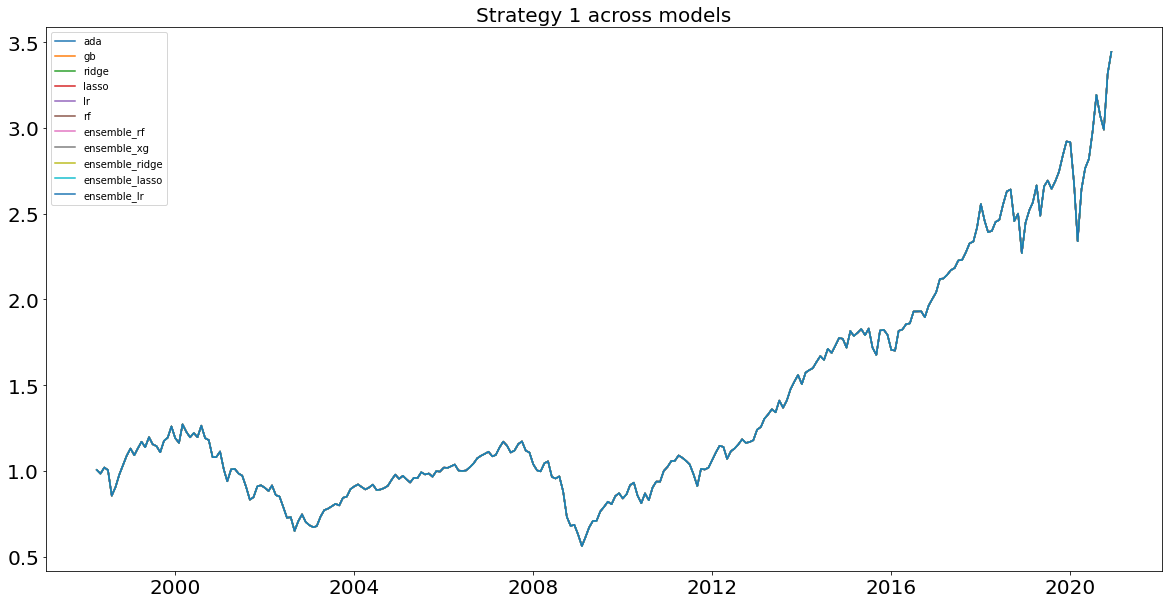

In [488]:
pd.DataFrame(strat1).plot(figsize=(20,10))
plt.title("Strategy 1 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [489]:
no_years = len(pred_df)/12

In [490]:
strat2_ann_return = []
strat2_df = pd.DataFrame(strat2)
for cols in strat2_df.columns:
    gross_ret = strat2_df.iloc[-1,:]/ strat2_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

annualized*100

ada               1.988583
gb               -2.047594
ridge             2.235412
lasso            -1.974656
lr                4.287650
rf                0.732124
ensemble_rf       0.869339
ensemble_xg      -0.671936
ensemble_ridge    3.651493
ensemble_lasso    5.557485
ensemble_lr       5.090136
dtype: float64

In [491]:
strat3_ann_return = []
strat3_df = pd.DataFrame(strat3)
for cols in strat3_df.columns:
    gross_ret = strat3_df.iloc[-1,:]/ strat3_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

In [492]:
annualized*100

ada               6.705297
gb                2.837657
ridge             7.092252
lasso             2.197507
lr                9.430311
rf                5.646974
ensemble_rf       4.906204
ensemble_xg       4.427297
ensemble_ridge    7.080091
ensemble_lasso    8.630409
ensemble_lr       9.269509
dtype: float64

In [493]:
strat4_ann_return = []
strat4_df = pd.DataFrame(strat4)
for cols in strat4_df.columns:
    gross_ret = strat4_df.iloc[-1,:]/ strat4_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

In [494]:
annualized*100

ada               4.177421
gb                2.190900
ridge             4.346155
lasso             2.056223
lr                5.431291
rf                3.597742
ensemble_rf       3.467089
ensemble_xg       2.939401
ensemble_ridge    4.704782
ensemble_lasso    5.557485
ensemble_lr       5.594771
dtype: float64

In [495]:
strat1_ann_return = []
strat1_df = pd.DataFrame(strat1)
for cols in strat1_df.columns:
    gross_ret = strat1_df.iloc[-1,:]/ strat1_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

In [496]:
annualized*100

ada               5.557485
gb                5.557485
ridge             5.557485
lasso             5.557485
lr                5.557485
rf                5.557485
ensemble_rf       5.557485
ensemble_xg       5.557485
ensemble_ridge    5.557485
ensemble_lasso    5.557485
ensemble_lr       5.557485
dtype: float64

## Same analysis with main predictions 

In [497]:
mega_df = pd.read_csv("data/main_pred_final.csv")
mega_df["date"] = mega_df["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

mega_df.set_index("date",inplace=True)

In [498]:
mega_df.columns

Index(['ridge_99', 'ridge_98', 'ridge_97', 'XG_9', 'XG_69', 'XG_49', 'lasso_7',
       'lasso_8', 'lasso_6', 'RF_1', 'RF_4', 'RF_5', 'actuals'],
      dtype='object')

In [499]:
### Pass minidf to ensembler
## Try everything else
base_models =['ridge_99', 'ridge_98', 'ridge_97', 'XG_9', 'XG_69', 'XG_49', 'lasso_7',
       'lasso_8', 'lasso_6', 'RF_1', 'RF_4', 'RF_5']

pred_datelist = mega_df.index.tolist()
small_df = mega_df.copy()
predictions_rf1 = ensembler(small_df, rf, "rf", pred_datelist, 0.6, base_models)
predictions_xgb1 = ensembler(small_df, xgb, "xgboost", pred_datelist, 0.6, base_models)
predictions_r1 = ensembler(small_df, ridge, "ridge", pred_datelist, 0.6, base_models)
predictions_l1 = ensembler(small_df, lasso, "lasso", pred_datelist, 0.6, base_models)
predictions_lr1 = ensembler(small_df, lr, "linear_regression", pred_datelist, 0.6, base_models)

In [500]:
pred_df =pd.concat([predictions_rf1,predictions_xgb1,predictions_r1,predictions_l1,predictions_lr1], axis=1)

In [501]:
pred_df["actuals"] = small_df[small_df.index.isin(pred_df.index.tolist())]["actuals"]

In [502]:
base_pred = small_df[small_df.index.isin(predictions_rf1.index.tolist())][base_models]

In [503]:
## Compare strategy 2 for every model
strat_dict = {}
for model in base_pred.columns:
    ret, cum_ret = trading_strategy(pred_df["actuals"], base_pred[model])
    strat_dict[model] = {"return":ret, "cumulative_return":cum_ret}

In [504]:
rf_ret, rf_cumret = trading_strategy(pred_df["actuals"], pred_df["rf"])
xg_ret, xg_cumret = trading_strategy(pred_df["actuals"], pred_df["xgboost"])
ridge_ret, ridge_cumret = trading_strategy(pred_df["actuals"], pred_df["ridge"])
lasso_ret, lasso_cumret = trading_strategy(pred_df["actuals"], pred_df["lasso"])
lr_ret, lr_cumret = trading_strategy(pred_df["actuals"], pred_df["linear_regression"])
strat_dict["ensemble_rf"] = {"return":rf_ret, "cumulative_return":rf_cumret}
strat_dict["ensemble_xg"] = {"return":xg_ret, "cumulative_return":xg_cumret}
strat_dict["ensemble_ridge"] = {"return":ridge_ret, "cumulative_return":ridge_cumret}
strat_dict["ensemble_lasso"] = {"return":lasso_ret, "cumulative_return":lasso_cumret}
strat_dict["ensemble_lr"] = {"return":lr_ret, "cumulative_return":lr_cumret}

In [505]:
strat2 = {}
for key, value in strat_dict.items():
    strat2[key] = value["cumulative_return"]["Strategy 2"]

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

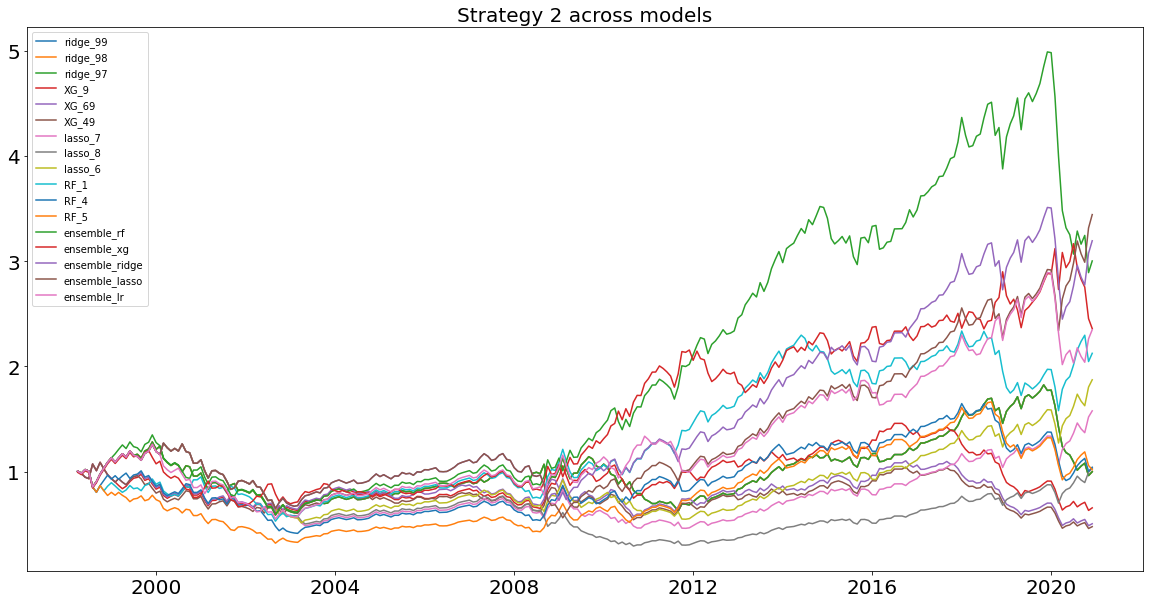

In [506]:
pd.DataFrame(strat2).plot(figsize=(20,10))
plt.title("Strategy 2 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [507]:
strat3 = {}
for key, value in strat_dict.items():
    strat3[key] = value["cumulative_return"]["Strategy 3"]

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

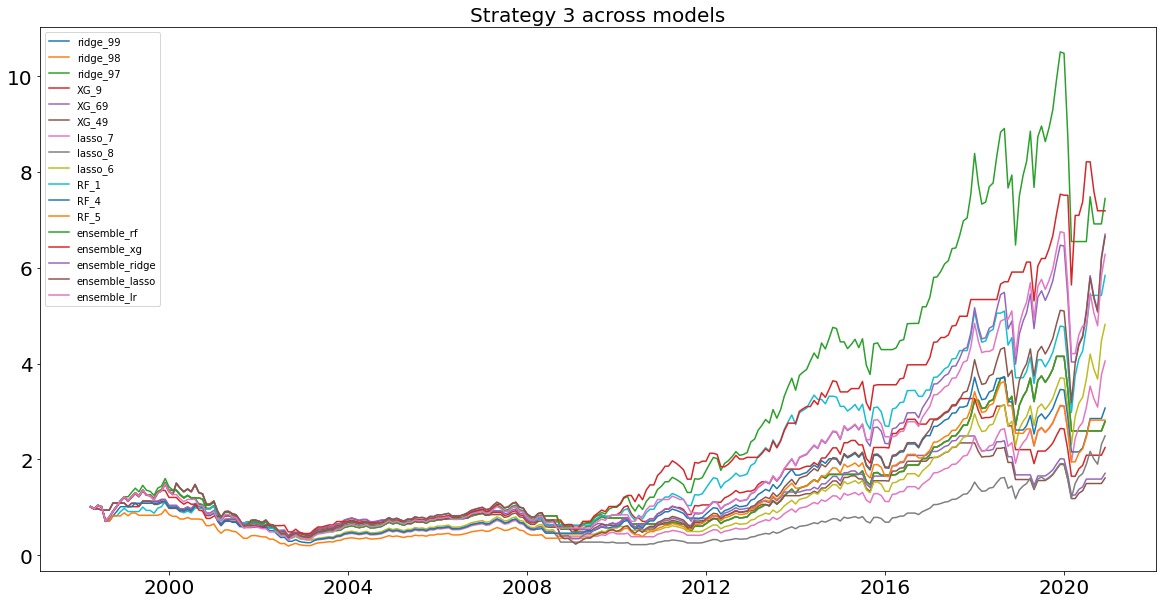

In [508]:
pd.DataFrame(strat3).plot(figsize=(20,10))
plt.title("Strategy 3 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [509]:
strat4 = {}
for key, value in strat_dict.items():
    strat4[key] = value["cumulative_return"]["Strategy 4"]

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

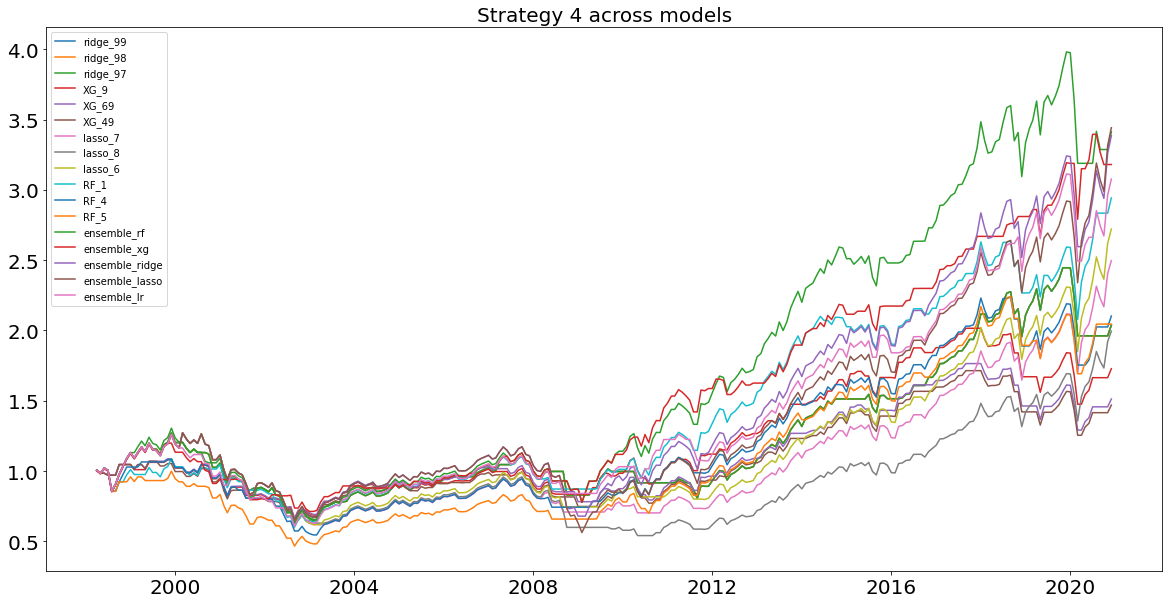

In [510]:
pd.DataFrame(strat4).plot(figsize=(20,10))
plt.title("Strategy 4 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [511]:
strat1 = {}
for key, value in strat_dict.items():
    strat1[key] = value["cumulative_return"]["Strategy 1"]

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

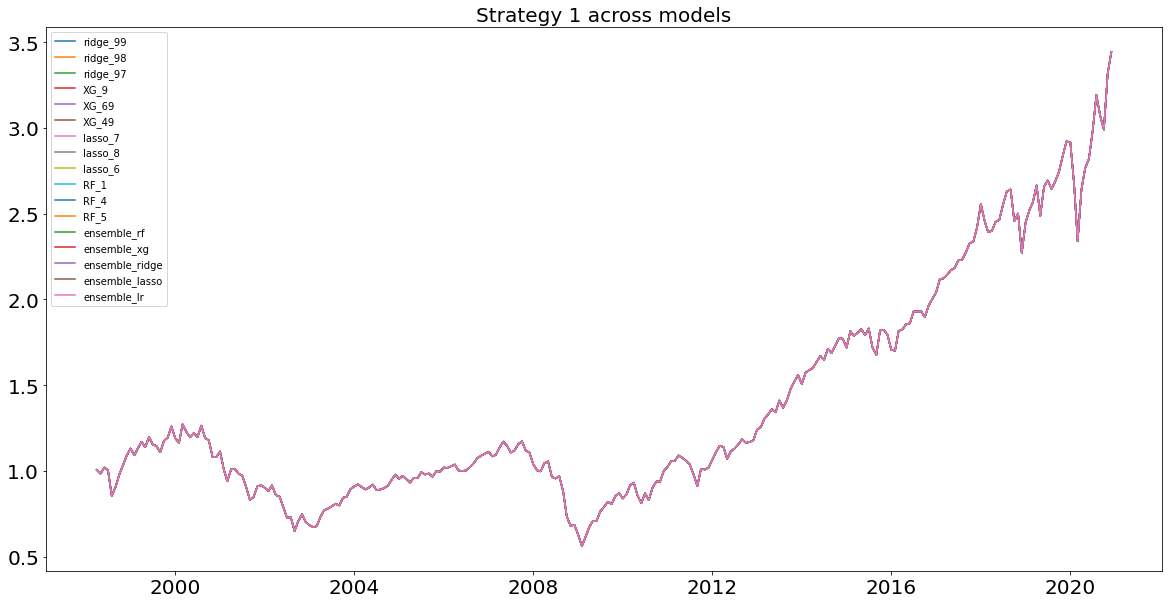

In [512]:
pd.DataFrame(strat1).plot(figsize=(20,10))
plt.title("Strategy 1 across models", size=20)
plt.xticks(size=20)
plt.yticks(size=20)

In [513]:
strat2_ann_return = []
strat2_df = pd.DataFrame(strat2)
for cols in strat2_df.columns:
    gross_ret = strat2_df.iloc[-1,:]/ strat2_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

annualized*100

ridge_99         -0.024299
ridge_98         -0.024299
ridge_97         -0.024299
XG_9             -1.855819
XG_69            -2.976037
XG_49            -3.214781
lasso_7           1.999729
lasso_8           0.117131
lasso_6           2.771225
RF_1              3.342422
RF_4              0.157676
RF_5              0.055197
ensemble_rf       4.924270
ensemble_xg       3.874259
ensemble_ridge    5.209784
ensemble_lasso    5.557485
ensemble_lr       3.798355
dtype: float64

In [514]:
strat3_ann_return = []
strat3_df = pd.DataFrame(strat3)
for cols in strat3_df.columns:
    gross_ret = strat3_df.iloc[-1,:]/ strat3_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

In [515]:
annualized*100

ridge_99          4.561832
ridge_98          4.561832
ridge_97          4.561832
XG_9              3.566665
XG_69             2.331697
XG_49             2.062723
lasso_7           6.287592
lasso_8           4.035709
lasso_6           7.099632
RF_1              8.007867
RF_4              4.999631
RF_5              4.605897
ensemble_rf       9.167989
ensemble_xg       9.056537
ensemble_ridge    8.662662
ensemble_lasso    8.630409
ensemble_lr       8.353108
dtype: float64

In [516]:
strat4_ann_return = []
strat4_df = pd.DataFrame(strat4)
for cols in strat4_df.columns:
    gross_ret = strat4_df.iloc[-1,:]/ strat4_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

In [517]:
annualized*100

ridge_99          3.150956
ridge_98          3.150956
ridge_97          3.150956
XG_9              2.406401
XG_69             1.808920
XG_49             1.679287
lasso_7           4.078137
lasso_8           3.056602
lasso_6           4.473050
RF_1              4.833097
RF_4              3.294255
RF_5              3.168358
ensemble_rf       5.518187
ensemble_xg       5.218454
ensemble_ridge    5.479451
ensemble_lasso    5.557485
ensemble_lr       5.038476
dtype: float64

In [462]:
strat1_ann_return = []
strat1_df = pd.DataFrame(strat1)
for cols in strat1_df.columns:
    gross_ret = strat1_df.iloc[-1,:]/ strat1_df.iloc[0,:]
    annualized = (gross_ret**(1/no_years)-1)

In [463]:
annualized*100

ridge_99          5.557485
ridge_98          5.557485
ridge_97          5.557485
XG_9              5.557485
XG_69             5.557485
XG_49             5.557485
lasso_7           5.557485
lasso_8           5.557485
lasso_6           5.557485
RF_1              5.557485
RF_4              5.557485
RF_5              5.557485
ensemble_rf       5.557485
ensemble_xg       5.557485
ensemble_ridge    5.557485
ensemble_lasso    5.557485
ensemble_lr       5.557485
dtype: float64